#  -------- This programming code is a raw version, an improved version will be uploaded soon  ---------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# The Data

In [2]:
## Open the data for the occupational data source 
## Create the dataframe for the information of the Osborne and Frey report 

f = open( 'futureemployment2.TXT', 'r')
df = pd.DataFrame(columns=['Rank', 'Probability', 'soc_code', 'Occupation'])


## Paste the data in the dataframe


for line in f:
    new = line.split(" ",3)
    
    df = df.append({'Rank': new[0],'Probability': new[1],'soc_code': new[2],'Occupation': new[3]}, ignore_index=True)


## Clean the occupation column

for i in range(0, len(df)):
    x = df.iloc[i]['Occupation']
    if ("\n" in x):
        a,b = x.split("\n")
        df["Occupation"].replace(x, value=a, inplace=True)
        
        
## Close the text file of the occupational data source
f.close
        
df.head()

,Rank,Probability,soc_code,Occupation
0,1.,0.0028,29-1125,Recreational Therapists
1,2.,0.003,49-1011,"First-Line Supervisors of Mechanics, Installer..."
2,3.,0.003,11-9161,Emergency Management Directors
3,4.,0.0031,21-1023,Mental Health and Substance Abuse Social Workers
4,5.,0.0033,29-1181,Audiologists


In [3]:
## Open the data containing the crosswalk between the ISCO-code and the SOC-code

df_cross = pd.read_excel("crosswalk.xlsx")

for i in range(0, len(df_cross)):
    x = df_cross.iloc[i]['soc_code']
    if (' ' in x):
        a,b = x.split(" ")
        df_cross["soc_code"].replace(x, value=a, inplace=True)

df_cross.head()

,isco_code,isco_08_title,soc_code,soc_10_title
0,110,Commissioned armed forces officers,55-1011,Air Crew Officers
1,110,Commissioned armed forces officers,55-1012,Aircraft Launch and Recovery Officers
2,110,Commissioned armed forces officers,55-1013,Armored Assault Vehicle Officers
3,110,Commissioned armed forces officers,55-1014,Artillery and Missile Officers
4,110,Commissioned armed forces officers,55-1015,Command and Control Center Officers


In [4]:
## Sector specification document for US data
f = open( 'categoriesUS.TXT', 'r')

df_USmg = pd.DataFrame(columns=['MG_code', 'title'])


## Paste the data in the dataframe


for line in f:
    new = line.split(" ",1)
    
    df_USmg = df_USmg.append({'MG_code': new[0],'title': new[1]}, ignore_index=True)


## Clean the occupation column

for i in range(0, len(df_USmg)):
    x = df_USmg.iloc[i]['title']
    if ("\n" in x):
        a,b = x.split("\n")
        df_USmg["title"].replace(x, value=a, inplace=True)
        
        
## Close the text file of the occupational data source
f.close
        
df_USmg.head()

,MG_code,title
0,11-0000,Management Occupations
1,13-0000,Business and Financial Operations Occupations
2,15-0000,Computer and Mathematical Occupations
3,17-0000,Architecture and Engineering Occupations
4,19-0000,"Life, Physical, and Social Science Occupations"


In [5]:
## Open the data with the numbers people working in a specific occupation

df_work = pd.read_excel("num_working.xlsx")
df_work.head()

,isco_code,isco_name,brc_beroep,brc_name,num_working
0,110,Officieren,634,Militaire beroepen,6
1,210,Onderofficieren,634,Militaire beroepen,6
2,310,Andere rangen,634,Militaire beroepen,10
3,1000,Leidinggevende functies,551,Managers z.n.d.,14
4,1100,"Directeuren van grote ondernemingen, beleidvo...",551,Managers z.n.d.,0


In [6]:
## Zat een fout in officiele document, nummer 1 was n
df_isco_of = pd.read_excel("indexisco_official.xlsx")
df_isco_of.head()

,isco_code,ISCO-88,English title
0,110,110,Admiral
1,110,110,"Brigadier, army"
2,110,110,"Cadet, officer: armed forces"
3,110,110,"Captain, air force"
4,110,110,"Captain, army"


In [7]:
## Open the crosswalk data to link the brc defined occupations to corresponding sectors

df_beroep = pd.read_excel("brc_sector.xlsx")
df_beroep = df_beroep.drop_duplicates()
df_beroep = df_beroep.reset_index()
df_beroep = df_beroep.drop(labels="index", axis = 1)
df_beroep.head()

,brc_beroep,brc_sector
0,634,6
1,551,5
2,611,6
3,1311,13
4,511,5


In [8]:
df_classlabel = pd.read_excel("class_label.xlsx")
df_classlabel.head()

,brc_sector,brc_class_label
0,1,Pedagogische beroepen
1,2,Creatieve en taalkundige beroepen
2,3,Commerciële beroepen
3,4,Bedrijfseconomische en administratieve beroepen
4,5,Managers


In [9]:
df_IBC = pd.merge(df_beroep,df_classlabel, on=['brc_sector'],how='inner')
df_IBC.head()

,brc_beroep,brc_sector,brc_class_label
0,634,6,"Openbaar bestuur, veiligheid en juridische ber..."
1,611,6,"Openbaar bestuur, veiligheid en juridische ber..."
2,621,6,"Openbaar bestuur, veiligheid en juridische ber..."
3,612,6,"Openbaar bestuur, veiligheid en juridische ber..."
4,631,6,"Openbaar bestuur, veiligheid en juridische ber..."


# 1. Coupling data

In [10]:
# Check which ISCO-codes are not in official document but are in the document of the Netherlands
def compare_df(df1,df2,compare_name):
    df_in = df1
    
    np1 = df1[compare_name].unique()

    np2 = df2[compare_name].unique()

    df_output = df_in.iloc[0:0]
    
    xyz = False
    number_missing = 0

    for i in np1:
        xyz = False
        for j in np2:
            if i == j:
                xyz = True
            
        if xyz == False:
            x = df_in[df_in[compare_name] == i]
            df_output = pd.concat([df_output,x])

    df_output = df_output.reset_index()
    df_output = df_output.drop(['index'],axis=1)
    return df_output

    NAME DATAFRAME   LABEL    SUBSCRIPTION                               SOURCE
    df               ODC      Occupational data source                   Research Osborne Frey
    df_cross         CRS      Crosswalk between SOC & ISCO               Bureau of Labor Statistics (US)
    df_USmg          SMG      Major groups definition SOC                Bureau of Labor Statistics (US)
    df_work          PPL      Number of people per occupation            Central bureau for statistics (NL)
    df_isco_of       ISC      Official listed ISCO codes                 International Standard Classifiation of Occupations
    df_beroep        BMG      Linking occupations to BRC major groups    Central bureau for statistics (NL)
    df_classlabel    LBL      Labeling sectors with names                Central bureau for statistics (NL)

In [11]:
y1 = len(df['soc_code'].unique())
y2 = len(df_cross['soc_code'].unique())

print('The length of unique SOC-codes in ODC') 
print(y1)

print('The length of unique SOC-codes in CRS') 
print(y2)

print('Difference in unique SOC-codes between ODC and CRS') 
print(abs(y1-y2))

print('Number of SOC-codes     in ODC   &&     Not in CRS')
p1 = compare_df(df,df_cross,'soc_code')
print(len(p1['soc_code'].unique()))

print('Number of SOC-codes     in CRS   &&     Not in ODC')
p2 = compare_df(df_cross,df,'soc_code')
print(len(p2['soc_code'].unique()))



The length of unique SOC-codes in ODC
702
The length of unique SOC-codes in CRS
840
Difference in unique SOC-codes between ODC and CRS
138
Number of SOC-codes     in ODC   &&     Not in CRS
17
Number of SOC-codes     in CRS   &&     Not in ODC
155


In [12]:
y3 = len(df_cross['isco_code'].unique())
y4 = len(df_isco_of['isco_code'].unique())

print('The length of unique ISCO-codes in CRS') 
print(y3)

print('The length of unique ISCO-codes in ISC') 
print(y4)

print('Difference in unique ISCO-codes between CRS and ISC') 
print(abs(y3-y4))

print('Number of ISCO-codes     in CRS   &&     Not in ISC')
p3 = compare_df(df_cross,df_isco_of,'isco_code')
print(len(p3['isco_code'].unique()))

print('Number of ISCO-codes     in ISC   &&     Not in CRS')
p4 = compare_df(df_isco_of,df_cross,'isco_code')
print(len(p4['isco_code'].unique()))


The length of unique ISCO-codes in CRS
438
The length of unique ISCO-codes in ISC
436
Difference in unique ISCO-codes between CRS and ISC
2
Number of ISCO-codes     in CRS   &&     Not in ISC
2
Number of ISCO-codes     in ISC   &&     Not in CRS
0


In [13]:
compare_df(df_cross,df_isco_of,'isco_code')

,isco_code,isco_08_title,soc_code,soc_10_title
0,211,Physical and earth science professionals,19-2099,"Physical Scientists, All Other"
1,315,Ship and aircraft controllers and technicians,53-2022,Airfield Operations Specialists


In [14]:
print(df_work[df_work['isco_code'] == 211])
print(df_work[df_work['isco_code'] == 315])

Empty DataFrame
Columns: [isco_code, isco_name, brc_beroep, brc_name, num_working]
Index: []
Empty DataFrame
Columns: [isco_code, isco_name, brc_beroep, brc_name, num_working]
Index: []


In [15]:
print(df[df['soc_code'] == '19-2099'])
print(df[df['soc_code'] == '53-2022'])

     Rank Probability soc_code                      Occupation
280  281.        0.43  19-2099  Physical Scientists, All Other
     Rank Probability soc_code                       Occupation
387  388.        0.71  53-2022  Airfield Operations Specialists


In [16]:
print(df_cross[df_cross['soc_code'] == '19-2099'])
print(df_cross[df_cross['soc_code'] == '53-2022'])

    isco_code                             isco_08_title soc_code  \
72        211  Physical and earth science professionals  19-2099   

                      soc_10_title  
72  Physical Scientists, All Other  
     isco_code                                  isco_08_title soc_code  \
372        315  Ship and aircraft controllers and technicians  53-2022   

                        soc_10_title  
372  Airfield Operations Specialists  


In [17]:
print(df_work[df_work['isco_code'] == 211])
print(df_work[df_work['isco_code'] == 315])

Empty DataFrame
Columns: [isco_code, isco_name, brc_beroep, brc_name, num_working]
Index: []
Empty DataFrame
Columns: [isco_code, isco_name, brc_beroep, brc_name, num_working]
Index: []


In [18]:
print(df_isco_of[df_isco_of['isco_code'] == 211])
print(df_isco_of[df_isco_of['isco_code'] == 315])

Empty DataFrame
Columns: [isco_code, ISCO-88, English title]
Index: []
Empty DataFrame
Columns: [isco_code, ISCO-88, English title]
Index: []


In [19]:
## Drop the rows in ODC and in CRS

df = df.drop([280,387], axis = 0)
df = df.reset_index()
df = df.drop(['index'],axis =1)

df_cross = df_cross.drop([72,372], axis = 0)
df_cross = df_cross.reset_index()
df_cross = df_cross.drop(['index'],axis =1)


In [20]:
# Check if the removal was succesfull
print(len(df['soc_code'].unique()))
print(len(df_cross['soc_code'].unique()))

700
838


In [21]:
## Analyse the situation again
y1 = len(df['soc_code'].unique())
y2 = len(df_cross['soc_code'].unique())

print('The length of unique SOC-codes in ODC') 
print(y1)

print('The length of unique SOC-codes in CRS') 
print(y2)

print('Difference in unique SOC-codes between ODC and CRS') 
print(abs(y1-y2))

print('Number of SOC-codes     in ODC   &&     Not in CRS')
p1 = compare_df(df,df_cross,'soc_code')
print(len(p1['soc_code'].unique()))

print('Number of SOC-codes     in CRS   &&     Not in ODC')
p2 = compare_df(df_cross,df,'soc_code')
print(len(p2['soc_code'].unique()))


The length of unique SOC-codes in ODC
700
The length of unique SOC-codes in CRS
838
Difference in unique SOC-codes between ODC and CRS
138
Number of SOC-codes     in ODC   &&     Not in CRS
17
Number of SOC-codes     in CRS   &&     Not in ODC
155


In [22]:
y3 = len(df_cross['isco_code'].unique())
y4 = len(df_isco_of['isco_code'].unique())

print('The length of unique ISCO-codes in CRS') 
print(y3)

print('The length of unique ISCO-codes in ISC') 
print(y4)

print('Difference in unique ISCO-codes between CRS and ISC') 
print(abs(y3-y4))

print('Number of ISCO-codes     in CRS   &&     Not in ISC')
p3 = compare_df(df_cross,df_isco_of,'isco_code')
print(len(p3['isco_code'].unique()))

print('Number of ISCO-codes     in ISC   &&     Not in CRS')
p4 = compare_df(df_isco_of,df_cross,'isco_code')
print(len(p4['isco_code'].unique()))

The length of unique ISCO-codes in CRS
436
The length of unique ISCO-codes in ISC
436
Difference in unique ISCO-codes between CRS and ISC
0
Number of ISCO-codes     in CRS   &&     Not in ISC
0
Number of ISCO-codes     in ISC   &&     Not in CRS
0


In [23]:
## Merge the occupational data source with the crosswalk document to link SOC-codes to ISCO-codes

new_df = pd.merge(df,df_cross, on=['soc_code'], how='inner')
new_df = new_df.drop(labels="isco_08_title", axis=1)
new_df = new_df.drop(labels="soc_10_title", axis=1)
print(len(df_cross['isco_code'].unique()))
print(len(new_df['isco_code'].unique()))
print(len(new_df['soc_code'].unique()))

436
402
683


In [24]:
expl1 = compare_df(df_cross,new_df,'isco_code')
len(expl1['isco_code'].unique())

34

In [25]:
expl1.head()

,isco_code,isco_08_title,soc_code,soc_10_title
0,110,Commissioned armed forces officers,55-1011,Air Crew Officers
1,110,Commissioned armed forces officers,55-1012,Aircraft Launch and Recovery Officers
2,110,Commissioned armed forces officers,55-1013,Armored Assault Vehicle Officers
3,110,Commissioned armed forces officers,55-1014,Artillery and Missile Officers
4,110,Commissioned armed forces officers,55-1015,Command and Control Center Officers


In [26]:
expl2 = compare_df(df,df_cross,'soc_code')
len(expl2['soc_code'].unique())

17

In [27]:
pd.options.display.max_colwidth = 100
expl2

,Rank,Probability,soc_code,Occupation
0,15.,0.0042,29-1060,Physicians and Surgeons
1,46.,0.009,29-1111,Registered Nurses
2,48.,0.0095,25-3999,"Teachers and Instructors, All Other"
3,112.,0.032,25-1000,Postsecondary Teachers
4,142.,0.055,29-9799,"Healthcare Practitioners and Technical Workers, All Other"
5,207.,0.2,39-4831,"Funeral Service Managers, Directors, Morticians, and Undertakers"
6,208.,0.21,15-1179,"Information Security Analysts, Web Developers, and Computer Network Architects"
7,212.,0.22,15-1799,"Computer Occupations, All Other"
8,218.,0.23,29-2037,Radiologic Technologists and Technicians
9,242.,0.31,13-1078,"Human Resources, Training, and Labor Relations Specialists, All Other"


In [28]:
## Next step is coupling the new created dataframe to the CBS data
new_df.head()

,Rank,Probability,soc_code,Occupation,isco_code
0,1.,0.0028,29-1125,Recreational Therapists,2269
1,2.,0.003,49-1011,"First-Line Supervisors of Mechanics, Installers, and Repairers",7127
2,2.,0.003,49-1011,"First-Line Supervisors of Mechanics, Installers, and Repairers",7231
3,2.,0.003,49-1011,"First-Line Supervisors of Mechanics, Installers, and Repairers",7232
4,2.,0.003,49-1011,"First-Line Supervisors of Mechanics, Installers, and Repairers",7233


In [29]:
df_work.head()

,isco_code,isco_name,brc_beroep,brc_name,num_working
0,110,Officieren,634,Militaire beroepen,6
1,210,Onderofficieren,634,Militaire beroepen,6
2,310,Andere rangen,634,Militaire beroepen,10
3,1000,Leidinggevende functies,551,Managers z.n.d.,14
4,1100,"Directeuren van grote ondernemingen, beleidvoerende functies, leden van wetgevende lichamen",551,Managers z.n.d.,0


In [30]:
y4 = len(df_isco_of['isco_code'].unique())
y5 = len(df_work['isco_code'].unique())
y6 = len(new_df['isco_code'].unique())

print('The length of unique ISCO-codes in ISC') 
print(y4)

print('The length of unique ISCO-codes in PPL') 
print(y5)

print('The length of unique ISCO-codes in new_df') 
print(y6)

print('Number of ISCO-codes (unique)    in ISC      &&    Not in new_df')
expl3 = compare_df(df_isco_of,new_df,'isco_code')
print(len(expl3['isco_code'].unique()))

print('Number of ISCO-codes (unique)    in new_df   &&    Not in ISC')
expl4 = compare_df(new_df,df_isco_of,'isco_code')
print(len(expl4['isco_code'].unique()))

print('Number of ISCO-codes (unique)    in PPL      &&    Not in new_df')
expl5 = compare_df(df_work,new_df,'isco_code')
print(len(expl5['isco_code'].unique()))

print('Number of ISCO-codes (unique)    in new_df   &&    Not in PPL')
expl6 = compare_df(new_df,df_work,'isco_code')
print(len(expl6['isco_code'].unique()))

print('Number of ISCO-codes (unique)    in ISC      &&    Not in PPL')
expl7 = compare_df(df_isco_of,df_work,'isco_code')
print(len(expl7['isco_code'].unique()))

print('Number of ISCO-codes             in PPL      &&    Not in ISC')
expl8 = compare_df(df_work,df_isco_of,'isco_code')
print(len(expl8['isco_code'].unique()))


The length of unique ISCO-codes in ISC
436
The length of unique ISCO-codes in PPL
532
The length of unique ISCO-codes in new_df
402
Number of ISCO-codes (unique)    in ISC      &&    Not in new_df
34
Number of ISCO-codes (unique)    in new_df   &&    Not in ISC
0
Number of ISCO-codes (unique)    in PPL      &&    Not in new_df
137
Number of ISCO-codes (unique)    in new_df   &&    Not in PPL
7
Number of ISCO-codes (unique)    in ISC      &&    Not in PPL
11
Number of ISCO-codes             in PPL      &&    Not in ISC
107


In [31]:
expl9 = compare_df(df_isco_of,df_work,'isco_code')
len(expl9['isco_code'].unique())

11

In [32]:
expl9.head()

,isco_code,ISCO-88,English title
0,1113,1130,"Chief, village"
1,1113,1130,"Elder, tribal"
2,1113,1130,"Head, village"
3,1312,1221,"Captain, shore: fishing"
4,1312,1311,"Manager, aquaculture"


In [33]:
expl10 = compare_df(new_df,df_work,'isco_code')
len(expl10['isco_code'].unique())

7

In [34]:
expl10

,Rank,Probability,soc_code,Occupation,isco_code
0,70.,0.015,11-1011,Chief Executives,1113
1,137.,0.047,11-9013,"Farmers, Ranchers, and Other Agricultural Managers",1312
2,157.,0.076,39-1021,First-Line Supervisors of Personal Service Workers,4414
3,406.,0.74,39-9021,Personal Care Aides,4414
4,258.,0.37,47-5081,Helpers–Extraction Workers,9311
5,292.,0.48,47-5031,"Explosives Workers, Ordnance Handling Experts, and Blasters",7542
6,425.,0.77,45-3021,Hunters and Trappers,6340
7,456.,0.83,45-3011,Fishers and Related Fishing Workers,6340
8,483.,0.85,53-7062,"Laborers and Freight, Stock, and Material Movers, Hand",9624


In [35]:
expl11 = compare_df(expl9,expl10,'isco_code')
len(expl11['isco_code'].unique())

4

In [36]:
expl11.head()

,isco_code,ISCO-88,English title
0,4213,4214,"Lender, money"
1,4213,4214,Money-lender
2,4213,4214,Pawnbroker
3,6310,6210,"Farmer, cereal: subsistence farming"
4,6310,6210,"Farmer, corn: subsistence farming"


In [37]:
## Merge the new created dataframe with the number of working people per ocupation

new_df2 = pd.merge(new_df,df_work, on=['isco_code'], how='inner')
new_df2 = new_df2.drop(labels="brc_name", axis=1)
new_df2.head()

,Rank,Probability,soc_code,Occupation,isco_code,isco_name,brc_beroep,num_working
0,1.,0.0028,29-1125,Recreational Therapists,2269,"Specialisten op het gebied van de gezondheidszorg, niet elders geclassificeerd",1013,10
1,6.,0.0035,29-1122,Occupational Therapists,2269,"Specialisten op het gebied van de gezondheidszorg, niet elders geclassificeerd",1013,10
2,23.,0.0046,29-1081,Podiatrists,2269,"Specialisten op het gebied van de gezondheidszorg, niet elders geclassificeerd",1013,10
3,85.,0.02,29-1199,"Health Diagnosing and Treating Practitioners, All Other",2269,"Specialisten op het gebied van de gezondheidszorg, niet elders geclassificeerd",1013,10
4,100.,0.027,29-1011,Chiropractors,2269,"Specialisten op het gebied van de gezondheidszorg, niet elders geclassificeerd",1013,10


In [38]:
len(new_df2['soc_code'].unique())

681

In [39]:
compare_df(df,new_df2, 'soc_code')

,Rank,Probability,soc_code,Occupation
0,15.,0.0042,29-1060,Physicians and Surgeons
1,46.,0.009,29-1111,Registered Nurses
2,48.,0.0095,25-3999,"Teachers and Instructors, All Other"
3,112.,0.032,25-1000,Postsecondary Teachers
4,142.,0.055,29-9799,"Healthcare Practitioners and Technical Workers, All Other"
5,207.,0.2,39-4831,"Funeral Service Managers, Directors, Morticians, and Undertakers"
6,208.,0.21,15-1179,"Information Security Analysts, Web Developers, and Computer Network Architects"
7,212.,0.22,15-1799,"Computer Occupations, All Other"
8,218.,0.23,29-2037,Radiologic Technologists and Technicians
9,242.,0.31,13-1078,"Human Resources, Training, and Labor Relations Specialists, All Other"


In [40]:
## Attach the sectors to the occupations
new_df3 = pd.merge(new_df2,df_beroep, on=['brc_beroep'], how='inner')
new_df3.head()

,Rank,Probability,soc_code,Occupation,isco_code,isco_name,brc_beroep,num_working,brc_sector
0,1.,0.0028,29-1125,Recreational Therapists,2269,"Specialisten op het gebied van de gezondheidszorg, niet elders geclassificeerd",1013,10,10
1,6.,0.0035,29-1122,Occupational Therapists,2269,"Specialisten op het gebied van de gezondheidszorg, niet elders geclassificeerd",1013,10,10
2,23.,0.0046,29-1081,Podiatrists,2269,"Specialisten op het gebied van de gezondheidszorg, niet elders geclassificeerd",1013,10,10
3,85.,0.02,29-1199,"Health Diagnosing and Treating Practitioners, All Other",2269,"Specialisten op het gebied van de gezondheidszorg, niet elders geclassificeerd",1013,10,10
4,100.,0.027,29-1011,Chiropractors,2269,"Specialisten op het gebied van de gezondheidszorg, niet elders geclassificeerd",1013,10,10


In [41]:

## Attach sector names
new_df4 = pd.merge(new_df3,df_classlabel, on=['brc_sector'], how='inner')
new_df4.head()

,Rank,Probability,soc_code,Occupation,isco_code,isco_name,brc_beroep,num_working,brc_sector,brc_class_label
0,1.,0.0028,29-1125,Recreational Therapists,2269,"Specialisten op het gebied van de gezondheidszorg, niet elders geclassificeerd",1013,10,10,Zorg en welzijn beroepen
1,6.,0.0035,29-1122,Occupational Therapists,2269,"Specialisten op het gebied van de gezondheidszorg, niet elders geclassificeerd",1013,10,10,Zorg en welzijn beroepen
2,23.,0.0046,29-1081,Podiatrists,2269,"Specialisten op het gebied van de gezondheidszorg, niet elders geclassificeerd",1013,10,10,Zorg en welzijn beroepen
3,85.,0.02,29-1199,"Health Diagnosing and Treating Practitioners, All Other",2269,"Specialisten op het gebied van de gezondheidszorg, niet elders geclassificeerd",1013,10,10,Zorg en welzijn beroepen
4,100.,0.027,29-1011,Chiropractors,2269,"Specialisten op het gebied van de gezondheidszorg, niet elders geclassificeerd",1013,10,10,Zorg en welzijn beroepen


In [42]:
expl12 = compare_df(df_work,df_isco_of,'isco_code')
len(expl12['isco_code'].unique())

107

In [43]:
expl12.head()

,isco_code,isco_name,brc_beroep,brc_name,num_working
0,1000,Leidinggevende functies,551,Managers z.n.d.,14
1,1100,"Directeuren van grote ondernemingen, beleidvoerende functies, leden van wetgevende lichamen",551,Managers z.n.d.,0
2,1110,"Leden van wetgevende lichamen, beleidvoerende functies",611,Overheidsbestuurders,0
3,1200,Leidinggevende functies op administratief en commercieel gebied,551,Managers z.n.d.,0
4,1210,Leidinggevende functies op het gebied van zakelijke diensten en op administratief gebied,521,Managers zakelijke en administratieve dienstverlening,0


In [44]:
expl121 = compare_df(df_work,expl12,'isco_code')
missing_people107X = compare_df(df_work, expl121, 'isco_code')
missing_people107X['num_working'].sum()

182

In [45]:
mis_ppl107XA5 = missing_people107X[missing_people107X['num_working']>5]
mis_ppl107XA5

,isco_code,isco_name,brc_beroep,brc_name,num_working
0,1000,Leidinggevende functies,551,Managers z.n.d.,14
12,2000,"Intellectuele, wetenschappelijke en artistieke beroepen",712,Ingenieurs (geen elektrotechniek),16
20,2300,Onderwijsgevenden,114,Leerkrachten basisonderwijs,13
51,4000,Administratief personeel,431,Administratief medewerkers,8
52,4100,Administratieve medewerkers,431,Administratief medewerkers,19
66,5320,Verzorgend personeel in de gezondheidszorg,1051,Verzorgenden,12
71,7000,Ambachtslieden,1311,Overig,27
88,8100,Bedieningspersoneel van stationaire machines en installaties,771,Productiemachinebedieners,20
96,8300,Bestuurders van voertuigen en bedieningspersoneel van mobiele installaties,1214,Vrachtwagenchauffeurs,21
102,9110,"Huishoudelijke hulpen en schoonmakers in huishoudens, hotels en kantoren",1121,Schoonmakers,10


In [46]:
# How many people are in the group of 107 occupations
expl13 = compare_df(df_isco_of,new_df4,'isco_code')
len(expl13['isco_code'].unique())

41

In [47]:
expl131 = compare_df(expl13,expl10,'isco_code')
expl132 = compare_df(expl131,expl11,'isco_code')
len(expl132['isco_code'].unique())

30

In [48]:
expl132.head()

,isco_code,ISCO-88,English title
0,110,110,Admiral
1,110,110,"Brigadier, army"
2,110,110,"Cadet, officer: armed forces"
3,110,110,"Captain, air force"
4,110,110,"Captain, army"


In [49]:
expl13211 = expl132.drop_duplicates('isco_code')
expl13211.head()

,isco_code,ISCO-88,English title
0,110,110,Admiral
39,210,110,"Airman, air force: warrant officer"
53,310,110,"Aircrew woman, navy"
88,1111,1110,Alderman
121,2211,2221,"Consultant, medical: general practice"


In [50]:
expl14 = compare_df(df_work,expl132,'isco_code')
missing_people30X = compare_df(df_work, expl14, 'isco_code')
missing_people30X['num_working'].sum()

408

In [51]:
mis_ppl30XA5 = missing_people30X[missing_people30X['num_working']>5]
mis_ppl30XA5

,isco_code,isco_name,brc_beroep,brc_name,num_working
0,110,Officieren,634,Militaire beroepen,6
1,210,Onderofficieren,634,Militaire beroepen,6
2,310,Andere rangen,634,Militaire beroepen,10
4,2211,Huisartsen,1011,Artsen,35
5,2212,Medisch specialisten,1011,Artsen,57
6,2221,Verpleegkundigen met hogere opleiding,1012,Gespecialiseerd verpleegkundigen,123
8,2310,Professoren en andere onderwijsgevenden in het hoger onderwijs,111,Docenten hoger onderwijs en hoogleraren,55
9,2513,Web- en multimediaontwikkelaars,811,Software- en applicatieontwikkelaars,14
10,2519,"Software- en applicatieontwikkelaars en –analisten, niet elders geclassificeerd",811,Software- en applicatieontwikkelaars,15
11,2523,Netwerkspecialisten,812,Databank- en netwerkspecialisten,11


In [52]:
## Convert dataframe to eliminate duplicates
df_eldu = new_df4.drop_duplicates(subset="isco_code")
df_eldu = df_eldu.reset_index()
df_eldu = df_eldu.drop(labels="index", axis = 1)
df_eldu.info()


## 354 entries are found which corresponds with the unique isco-codes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 10 columns):
Rank               395 non-null object
Probability        395 non-null object
soc_code           395 non-null object
Occupation         395 non-null object
isco_code          395 non-null int64
isco_name          395 non-null object
brc_beroep         395 non-null int64
num_working        395 non-null int64
brc_sector         395 non-null int64
brc_class_label    395 non-null object
dtypes: int64(4), object(6)
memory usage: 21.6+ KB


In [53]:
sum_eldu = 1000 * df_eldu['num_working'].sum()
sum_30X = 1000 * missing_people30X['num_working'].sum()
sum_work = 1000 * df_work['num_working'].sum()
sum_107X = 1000 * missing_people107X['num_working'].sum()

print ("Number of people working in newly created dataframe")
print (sum_eldu)
print ("Number of people working occupations 30X professions")
print (sum_30X)
print ("Number of people working occupations 107X professions")
print (sum_107X)
print ("\n" + "Number of people working in the Netherlands")
print (sum_work)

print("\n"+ "Percentage of people lost in combining datasets:  {:.1%}".format(1-(sum_eldu/sum_work)))
print("Percentage of people in 30X professions:  {:.1%}".format((sum_30X/sum_work)))
print("Percentage of people in 107X professions:  {:.1%}".format((sum_107X/sum_work)))

Number of people working in newly created dataframe
7947000
Number of people working occupations 30X professions
408000
Number of people working occupations 107X professions
182000

Number of people working in the Netherlands
8537000

Percentage of people lost in combining datasets:  6.9%
Percentage of people in 30X professions:  4.8%
Percentage of people in 107X professions:  2.1%


In [54]:
## Sort data by ISCO-code 
## ISCO-codes need to be unique since else there are duplicates of number of people working which misleads to think there are more people

dfx = new_df4
dfx = dfx.sort_values("isco_code")
dfx.head()

,Rank,Probability,soc_code,Occupation,isco_code,isco_name,brc_beroep,num_working,brc_sector,brc_class_label
462,3.,0.003,11-9161,Emergency Management Directors,1112,Ambtenaren in beleidvoerende functies,611,16,6,"Openbaar bestuur, veiligheid en juridische beroepen"
464,195.,0.16,11-1021,General and Operations Managers,1112,Ambtenaren in beleidvoerende functies,611,16,6,"Openbaar bestuur, veiligheid en juridische beroepen"
463,70.,0.015,11-1011,Chief Executives,1112,Ambtenaren in beleidvoerende functies,611,16,6,"Openbaar bestuur, veiligheid en juridische beroepen"
465,67.,0.015,11-2031,Public Relations and Fundraising Managers,1114,Beleidvoerende medewerkers van belangenorganisaties,611,5,6,"Openbaar bestuur, veiligheid en juridische beroepen"
466,195.,0.16,11-1021,General and Operations Managers,1114,Beleidvoerende medewerkers van belangenorganisaties,611,5,6,"Openbaar bestuur, veiligheid en juridische beroepen"


In [55]:
dfx[dfx['isco_code'] == 1212]

,Rank,Probability,soc_code,Occupation,isco_code,isco_name,brc_beroep,num_working,brc_sector,brc_class_label
502,28.,0.0055,11-3121,Human Resources Managers,1212,Leidinggevende functies op het gebied van personeelszaken,521,18,5,Managers
503,30.,0.0063,11-3131,Training and Development Managers,1212,Leidinggevende functies op het gebied van personeelszaken,521,18,5,Managers
504,630.,0.96,11-3111,Compensation and Benefits Managers,1212,Leidinggevende functies op het gebied van personeelszaken,521,18,5,Managers


In [56]:
## Convert the column 'Probability' to numeric

dfx["Probability"] = pd.to_numeric(dfx["Probability"])
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910 entries, 462 to 863
Data columns (total 10 columns):
Rank               910 non-null object
Probability        910 non-null float64
soc_code           910 non-null object
Occupation         910 non-null object
isco_code          910 non-null int64
isco_name          910 non-null object
brc_beroep         910 non-null int64
num_working        910 non-null int64
brc_sector         910 non-null int64
brc_class_label    910 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 60.4+ KB


In [57]:
dfx.head()

,Rank,Probability,soc_code,Occupation,isco_code,isco_name,brc_beroep,num_working,brc_sector,brc_class_label
462,3.,0.003,11-9161,Emergency Management Directors,1112,Ambtenaren in beleidvoerende functies,611,16,6,"Openbaar bestuur, veiligheid en juridische beroepen"
464,195.,0.160,11-1021,General and Operations Managers,1112,Ambtenaren in beleidvoerende functies,611,16,6,"Openbaar bestuur, veiligheid en juridische beroepen"
463,70.,0.015,11-1011,Chief Executives,1112,Ambtenaren in beleidvoerende functies,611,16,6,"Openbaar bestuur, veiligheid en juridische beroepen"
465,67.,0.015,11-2031,Public Relations and Fundraising Managers,1114,Beleidvoerende medewerkers van belangenorganisaties,611,5,6,"Openbaar bestuur, veiligheid en juridische beroepen"
466,195.,0.160,11-1021,General and Operations Managers,1114,Beleidvoerende medewerkers van belangenorganisaties,611,5,6,"Openbaar bestuur, veiligheid en juridische beroepen"


In [58]:
len(dfx['isco_code'].unique())

395

In [59]:
df_match = mis_ppl107XA5.append(mis_ppl30XA5)




In [60]:
df_match = df_match.sort_values('num_working',ascending= False)
# Data was not picked up by manual entry by a few match, therefor literal input values are used there
P1 = df_match.iloc[18,0]
P2 = df_match.iloc[2,0]
P3 = df_match.iloc[4,0]
P4 = df_match.iloc[12,0]
df_match

,isco_code,isco_name,brc_beroep,brc_name,num_working
6,2221,Verpleegkundigen met hogere opleiding,1012,Gespecialiseerd verpleegkundigen,123
5,2212,Medisch specialisten,1011,Artsen,57
8,2310,Professoren en andere onderwijsgevenden in het hoger onderwijs,111,Docenten hoger onderwijs en hoogleraren,55
4,2211,Huisartsen,1011,Artsen,35
18,3512,Technici voor informatie- en communicatietechnologie: gebruikersondersteuning,821,Gebruikersondersteuning ICT,27
71,7000,Ambachtslieden,1311,Overig,27
96,8300,Bestuurders van voertuigen en bedieningspersoneel van mobiele installaties,1214,Vrachtwagenchauffeurs,21
88,8100,Bedieningspersoneel van stationaire machines en installaties,771,Productiemachinebedieners,20
52,4100,Administratieve medewerkers,431,Administratief medewerkers,19
12,2000,"Intellectuele, wetenschappelijke en artistieke beroepen",712,Ingenieurs (geen elektrotechniek),16


In [61]:
## expl2 is the 17 lost occupations
## expl10 is the 7  lost occupation
a = df[df['soc_code'] == '19-2099']
b = df[df['soc_code'] == '53-2022']
c = expl10[['Rank','Probability','soc_code', 'Occupation']]



dfm = expl2.append(c)
dfm = dfm.append(a)
dfm = dfm.append(b)
dfm

,Rank,Probability,soc_code,Occupation
0,15.,0.0042,29-1060,Physicians and Surgeons
1,46.,0.009,29-1111,Registered Nurses
2,48.,0.0095,25-3999,"Teachers and Instructors, All Other"
3,112.,0.032,25-1000,Postsecondary Teachers
4,142.,0.055,29-9799,"Healthcare Practitioners and Technical Workers, All Other"
5,207.,0.2,39-4831,"Funeral Service Managers, Directors, Morticians, and Undertakers"
6,208.,0.21,15-1179,"Information Security Analysts, Web Developers, and Computer Network Architects"
7,212.,0.22,15-1799,"Computer Occupations, All Other"
8,218.,0.23,29-2037,Radiologic Technologists and Technicians
9,242.,0.31,13-1078,"Human Resources, Training, and Labor Relations Specialists, All Other"


In [62]:
df_match2 = dfm
df_match2['isco_code'] = 0
df_match2

,Rank,Probability,soc_code,Occupation,isco_code
0,15.,0.0042,29-1060,Physicians and Surgeons,0
1,46.,0.009,29-1111,Registered Nurses,0
2,48.,0.0095,25-3999,"Teachers and Instructors, All Other",0
3,112.,0.032,25-1000,Postsecondary Teachers,0
4,142.,0.055,29-9799,"Healthcare Practitioners and Technical Workers, All Other",0
5,207.,0.2,39-4831,"Funeral Service Managers, Directors, Morticians, and Undertakers",0
6,208.,0.21,15-1179,"Information Security Analysts, Web Developers, and Computer Network Architects",0
7,212.,0.22,15-1799,"Computer Occupations, All Other",0
8,218.,0.23,29-2037,Radiologic Technologists and Technicians,0
9,242.,0.31,13-1078,"Human Resources, Training, and Labor Relations Specialists, All Other",0


In [63]:
#Adding doctors and surgeons
#df_match2 = df_match2.append(df_match2[df_match2['soc_code']== '29-1060'])
df_match2 = df_match2.reset_index(drop=True)


In [64]:
df_match2.iloc[0,4] = 2212
df_match2.iloc[17,4] = 1000

In [65]:
#df_match2

In [66]:
# Adding registered nurses
df_match2.iloc[1,4] = 2221

#df_match2

In [67]:
# Adding post secondary teachers
df_match2.iloc[3,4] = P2

In [68]:
#df_match2

In [69]:
# Adding computer support specialist
df_match2.iloc[13,4] = P3

In [70]:
#df_match2

In [71]:
## Adding miscelanious agricultural workers
df_match2.iloc[15,4] = P1

In [72]:
df_match2

,Rank,Probability,soc_code,Occupation,isco_code
0,15.,0.0042,29-1060,Physicians and Surgeons,2212
1,46.,0.009,29-1111,Registered Nurses,2221
2,48.,0.0095,25-3999,"Teachers and Instructors, All Other",0
3,112.,0.032,25-1000,Postsecondary Teachers,2310
4,142.,0.055,29-9799,"Healthcare Practitioners and Technical Workers, All Other",0
5,207.,0.2,39-4831,"Funeral Service Managers, Directors, Morticians, and Undertakers",0
6,208.,0.21,15-1179,"Information Security Analysts, Web Developers, and Computer Network Architects",0
7,212.,0.22,15-1799,"Computer Occupations, All Other",0
8,218.,0.23,29-2037,Radiologic Technologists and Technicians,0
9,242.,0.31,13-1078,"Human Resources, Training, and Labor Relations Specialists, All Other",0


In [73]:
#Conclusion is that all the matched data is from 30X

In [74]:
matched_data = pd.merge(df_match2, df_match , on=['isco_code'], how='inner' )
matched_data["Probability"] = pd.to_numeric(matched_data["Probability"])

In [75]:
## Attach the sectors to the occupations
matched_data = pd.merge(matched_data,df_beroep, on=['brc_beroep'], how='inner')
matched_data.head()
## Attach sector names
matched_data = pd.merge(matched_data,df_classlabel, on=['brc_sector'], how='inner')
matched_data.head()

,Rank,Probability,soc_code,Occupation,isco_code,isco_name,brc_beroep,brc_name,num_working,brc_sector,brc_class_label
0,15.,0.0042,29-1060,Physicians and Surgeons,2212,Medisch specialisten,1011,Artsen,57,10,Zorg en welzijn beroepen
1,46.,0.0090,29-1111,Registered Nurses,2221,Verpleegkundigen met hogere opleiding,1012,Gespecialiseerd verpleegkundigen,123,10,Zorg en welzijn beroepen
2,112.,0.0320,25-1000,Postsecondary Teachers,2310,Professoren en andere onderwijsgevenden in het hoger onderwijs,111,Docenten hoger onderwijs en hoogleraren,55,1,Pedagogische beroepen
3,359.,0.6500,15-1150,Computer Support Specialists,3512,Technici voor informatie- en communicatietechnologie: gebruikersondersteuning,821,Gebruikersondersteuning ICT,27,8,ICT beroepen
4,501.,0.8700,45-2090,Miscellaneous Agricultural Workers,9211,Ongeschoolde arbeiders in de akkerbouw,921,Hulpkrachten landbouw,9,9,Agrarische beroepen


In [76]:
matched_data[['soc_code','Occupation','isco_code','isco_name','Probability','num_working']]

,soc_code,Occupation,isco_code,isco_name,Probability,num_working
0,29-1060,Physicians and Surgeons,2212,Medisch specialisten,0.0042,57
1,29-1111,Registered Nurses,2221,Verpleegkundigen met hogere opleiding,0.0090,123
2,25-1000,Postsecondary Teachers,2310,Professoren en andere onderwijsgevenden in het hoger onderwijs,0.0320,55
3,15-1150,Computer Support Specialists,3512,Technici voor informatie- en communicatietechnologie: gebruikersondersteuning,0.6500,27
4,45-2090,Miscellaneous Agricultural Workers,9211,Ongeschoolde arbeiders in de akkerbouw,0.8700,9
5,11-1011,Chief Executives,1000,Leidinggevende functies,0.0150,14


In [77]:
dfx = dfx.append(matched_data)


In [78]:
dfx = dfx.sort_values("isco_code")
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 5 to 862
Data columns (total 11 columns):
Occupation         916 non-null object
Probability        916 non-null float64
Rank               916 non-null object
brc_beroep         916 non-null int64
brc_class_label    916 non-null object
brc_name           6 non-null object
brc_sector         916 non-null int64
isco_code          916 non-null int64
isco_name          916 non-null object
num_working        916 non-null int64
soc_code           916 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 64.4+ KB


In [79]:
missing_people24X = compare_df(missing_people30X,matched_data,'isco_code')
missing_people24X

,isco_code,isco_name,brc_beroep,brc_name,num_working
0,110,Officieren,634,Militaire beroepen,6
1,210,Onderofficieren,634,Militaire beroepen,6
2,310,Andere rangen,634,Militaire beroepen,10
3,1111,Leden van wetgevende lichamen,611,Overheidsbestuurders,5
4,2211,Huisartsen,1011,Artsen,35
5,2222,Verloskundigen,1012,Gespecialiseerd verpleegkundigen,5
6,2513,Web- en multimediaontwikkelaars,811,Software- en applicatieontwikkelaars,14
7,2519,"Software- en applicatieontwikkelaars en –analisten, niet elders geclassificeerd",811,Software- en applicatieontwikkelaars,15
8,2523,Netwerkspecialisten,812,Databank- en netwerkspecialisten,11
9,2529,"Databank- en netwerkspecialisten, niet elders geclassificeerd",812,Databank- en netwerkspecialisten,5


In [80]:

df_eldu = dfx.drop_duplicates(subset="isco_code")
df_eldu = df_eldu.reset_index()
df_eldu = df_eldu.drop(labels="index", axis = 1)
df_eldu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 11 columns):
Occupation         401 non-null object
Probability        401 non-null float64
Rank               401 non-null object
brc_beroep         401 non-null int64
brc_class_label    401 non-null object
brc_name           6 non-null object
brc_sector         401 non-null int64
isco_code          401 non-null int64
isco_name          401 non-null object
num_working        401 non-null int64
soc_code           401 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 25.1+ KB


In [81]:
sum_eldu = 1000 * df_eldu['num_working'].sum()
sum_24X = 1000 * missing_people24X['num_working'].sum()
sum_work = 1000 * df_work['num_working'].sum()
sum_107X = 1000 * missing_people107X['num_working'].sum()

print ("Number of people working in newly created dataframe")
print (sum_eldu)
print ("Number of people working occupations 24X professions")
print (sum_24X)
print ("Number of people working occupations 107X professions")
print (sum_107X)
print ("\n" + "Number of people working in the Netherlands")
print (sum_work)

print("\n"+ "Percentage of people lost in combining datasets:  {:.1%}".format(1-(sum_eldu/sum_work)))
print("Percentage of people in 24X professions:  {:.1%}".format((sum_24X/sum_work)))
print("Percentage of people in 107X professions:  {:.1%}".format((sum_107X/sum_work)))

Number of people working in newly created dataframe
8232000
Number of people working occupations 24X professions
137000
Number of people working occupations 107X professions
182000

Number of people working in the Netherlands
8537000

Percentage of people lost in combining datasets:  3.6%
Percentage of people in 24X professions:  1.6%
Percentage of people in 107X professions:  2.1%


## Which data is lost?

In [82]:
lost_data = missing_people24X.append(missing_people107X)

In [83]:
lost_data.head()

,isco_code,isco_name,brc_beroep,brc_name,num_working
0,110,Officieren,634,Militaire beroepen,6
1,210,Onderofficieren,634,Militaire beroepen,6
2,310,Andere rangen,634,Militaire beroepen,10
3,1111,Leden van wetgevende lichamen,611,Overheidsbestuurders,5
4,2211,Huisartsen,1011,Artsen,35


In [84]:
expl800 = plot_sectors2(lost_data, 'num_working')
expl800

NameError: name 'plot_sectors2' is not defined

In [85]:
expl23 = plot_sectors1(new_df6, 'num_working')
expl23

NameError: name 'plot_sectors1' is not defined

In [86]:
ld_graph = expl800['brc_class_label']
ld_graph = pd.DataFrame(ld_graph)
ld_graph['lost_data'] = expl800['num_working']
ld_graph['num_working'] = expl23['num_working']

ld_graph['percentage_lost'] = (expl800['num_working'])/(expl23['num_working'])
ld_graph = ld_graph.sort_values('percentage_lost', axis=0,ascending=False)
ld_graph = ld_graph[0:12]
ld_graph = ld_graph.round({'percentage_lost':3})
ld_graph

NameError: name 'expl800' is not defined

In [87]:
ld_graph2 = ld_graph
ld_graph2 = ld_graph2.reset_index(drop=True)
ld_graph2 = ld_graph2.drop(['percentage_lost'], axis =1)
ld_graph2


NameError: name 'ld_graph' is not defined

In [88]:
ld_graph2.plot.bar(x ='brc_class_label')
plt.show()

NameError: name 'ld_graph2' is not defined

#   
# 2. Removing values of 0

In [89]:
## Check if there are unassigned instances

for i in range(0, len(dfx)):
    x = dfx.iloc[i]['Probability']
    #print(type(x))
    
    if (x >= 1) or (x <= 0):
        print (x)
        
## No output is given therefor all the instances have been given an probability

In [90]:
## Convert dataframe to eliminate duplicates
df_eldu = dfx.drop_duplicates(subset="isco_code")
df_eldu = df_eldu.reset_index()
df_eldu = df_eldu.drop(labels="index", axis = 1)
df_eldu.info()


## 395 entries are found which corresponds with the unique isco-codes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 11 columns):
Occupation         401 non-null object
Probability        401 non-null float64
Rank               401 non-null object
brc_beroep         401 non-null int64
brc_class_label    401 non-null object
brc_name           6 non-null object
brc_sector         401 non-null int64
isco_code          401 non-null int64
isco_name          401 non-null object
num_working        401 non-null int64
soc_code           401 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 25.1+ KB


In [91]:
def plot_sectors1(df,numbers):

    df1 = pd.merge(df,df_classlabel,on=['brc_sector'],how='inner')
#    expl215 = pd.merge(expl21,df_beroep,on=['brc_beroep'], how='inner')
 #   expl215 = pd.merge(expl215,df_classlabel,on=['brc_sector'],how='inner')
  #  expl215
    
    df2 = pd.DataFrame.copy(df_classlabel)
    df2[numbers] = 0
    df2

    for i in range(len(df_classlabel)-1):
        i = i + 1
        x = df1[df1['brc_sector'] == i]
        y = x[numbers].sum()
    
        df2.loc[(i-1),numbers] = y
 
        #i = i - 1
    return df2

In [92]:
def plot_sectors2(df,numbers):
    df1 = pd.merge(df,df_beroep,on=['brc_beroep'], how='inner')
    df1 = pd.merge(df1,df_classlabel,on=['brc_sector'],how='inner')
#    expl215 = pd.merge(expl21,df_beroep,on=['brc_beroep'], how='inner')
 #   expl215 = pd.merge(expl215,df_classlabel,on=['brc_sector'],how='inner')
  #  expl215
    
    df2 = pd.DataFrame.copy(df_classlabel)
    df2[numbers] = 0
    df2

    for i in range(len(df_classlabel)-1):
        i = i + 1
        x = df1[df1['brc_sector'] == i]
        y = x[numbers].sum()
    
        df2.loc[(i-1),numbers] = y
 
        #i = i - 1
    return df2
   

In [93]:
def plot_overlay(df,label,columnA,columnB):
    #y = np.random.rand(10,4)
    #y[:,0]= np.arange(10)
    #df = pd.DataFrame(y, columns=["X", "A", "B", "C"])

    ax = df.plot(x=label, y=columnA, kind="bar")
    df.plot(x=label, y=columnB, kind="bar", ax=ax, color="C2")
    #df.plot(x=label, y=columnC, kind="bar", ax=ax, color="C3")

    plt.show()

In [94]:
len(dfx['isco_code'].unique())

401

In [95]:
len(dfx)

916

new_df5 is the dataframe with all the 0 values removed from the dataset

In [96]:
## Convert dataframe to eliminate duplicates
new_df6 = dfx.drop_duplicates(subset="isco_code")
new_df6 = new_df6.reset_index()
new_df6 = new_df6.drop(labels="index", axis = 1)
new_df6.info()


## 354 entries are found which corresponds with the unique isco-codes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 11 columns):
Occupation         401 non-null object
Probability        401 non-null float64
Rank               401 non-null object
brc_beroep         401 non-null int64
brc_class_label    401 non-null object
brc_name           6 non-null object
brc_sector         401 non-null int64
isco_code          401 non-null int64
isco_name          401 non-null object
num_working        401 non-null int64
soc_code           401 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 25.1+ KB


In [97]:
expl19 = dfx['brc_sector'].value_counts()
expl19 = pd.DataFrame(expl19)
expl19 = expl19.reset_index()
expl19 = expl19.rename(columns={'index':'brc_sector','brc_sector':'num_occupations'})
expl19 = pd.merge(expl19,df_classlabel,on=['brc_sector'], how='inner')
expl19

,brc_sector,num_occupations,brc_class_label
0,7,375,Technische beroepen
1,4,100,Bedrijfseconomische en administratieve beroepen
2,10,89,Zorg en welzijn beroepen
3,12,68,Transport en logistiek beroepen
4,11,56,Dienstverlenende beroepen
5,5,41,Managers
6,3,39,Commerciële beroepen
7,6,36,"Openbaar bestuur, veiligheid en juridische beroepen"
8,2,36,Creatieve en taalkundige beroepen
9,9,32,Agrarische beroepen


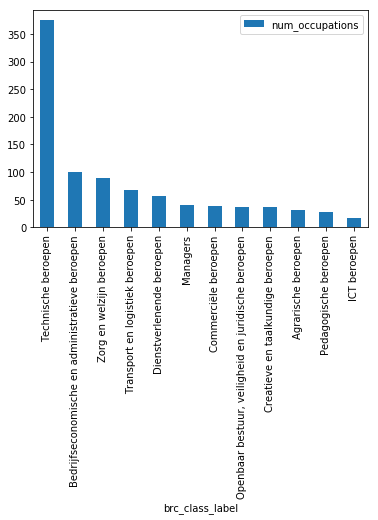

In [98]:
expl20 = expl19.plot.bar(x='brc_class_label',y='num_occupations')
plt.show()

In [99]:
# Make plot with people per occupation with how many people are working there

In [100]:
expl23 = plot_sectors1(dfx, 'num_working')
expl23

,brc_sector,brc_class_label,num_working
0,1,Pedagogische beroepen,966
1,2,Creatieve en taalkundige beroepen,449
2,3,Commerciële beroepen,1923
3,4,Bedrijfseconomische en administratieve beroepen,3425
4,5,Managers,716
5,6,"Openbaar bestuur, veiligheid en juridische beroepen",528
6,7,Technische beroepen,4065
7,8,ICT beroepen,529
8,9,Agrarische beroepen,329
9,10,Zorg en welzijn beroepen,2290


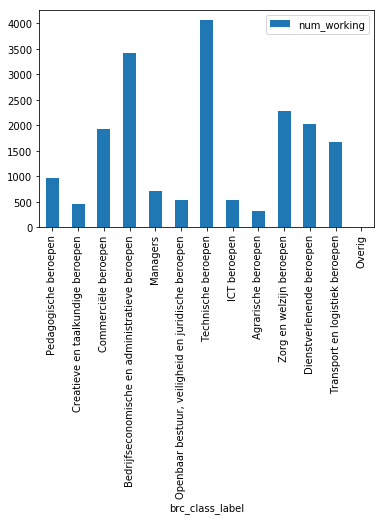

In [101]:
expl23.plot.bar(x='brc_class_label',y='num_working')
plt.show()

#   
# 3. Uncertainties

## 3.1 Double OF percentages 

In [102]:
def prob_dist (row):
    if ((row['dublicate_TF']) == False):
        return row['Probability']
    else:
        return 0


In [103]:
def duplicate_TF (row):
    if (row['numberduplicates']) > 1 :
        return True
    else:
        return False

In [104]:
dfx.head()

,Occupation,Probability,Rank,brc_beroep,brc_class_label,brc_name,brc_sector,isco_code,isco_name,num_working,soc_code
5,Chief Executives,0.015,70.,551,Managers,Managers z.n.d.,5,1000,Leidinggevende functies,14,11-1011
463,Chief Executives,0.015,70.,611,"Openbaar bestuur, veiligheid en juridische beroepen",NaN,6,1112,Ambtenaren in beleidvoerende functies,16,11-1011
462,Emergency Management Directors,0.003,3.,611,"Openbaar bestuur, veiligheid en juridische beroepen",NaN,6,1112,Ambtenaren in beleidvoerende functies,16,11-9161
464,General and Operations Managers,0.160,195.,611,"Openbaar bestuur, veiligheid en juridische beroepen",NaN,6,1112,Ambtenaren in beleidvoerende functies,16,11-1021
467,"Managers, All Other",0.250,226.,611,"Openbaar bestuur, veiligheid en juridische beroepen",NaN,6,1114,Beleidvoerende medewerkers van belangenorganisaties,5,11-9199


In [105]:
#pd.value_counts(dfx["isco_code"] )
expl24 =dfx['isco_code'].value_counts()
expl24.head()

7412    13
8142    12
7223    11
3119    10
7231    10
Name: isco_code, dtype: int64

In [106]:
expl25 = pd.DataFrame(expl24)
expl25 = expl25.reset_index()
expl25 = expl25.rename(index = str, columns = {"index":"isco_code","isco_code":"numberduplicates"}) 
expl25.head()

,isco_code,numberduplicates
0,7412,13
1,8142,12
2,7223,11
3,3119,10
4,7231,10


In [107]:
len(expl25[expl25['numberduplicates'] > 1])

238

In [108]:
new_df7 = new_df6

In [109]:
expl25['duplicate_TF'] = expl25.apply (lambda row: duplicate_TF(row), axis=1)
expl255 = expl25.drop(labels = 'numberduplicates',axis=1)
expl255.head()

,isco_code,duplicate_TF
0,7412,True
1,8142,True
2,7223,True
3,3119,True
4,7231,True


In [110]:
new_df7 = pd.merge(new_df7,expl255,on=['isco_code'], how ='inner')


In [111]:
expl26 = new_df7[new_df7['duplicate_TF']==False]
expl26['num_working'].sum()

3030

In [112]:
df_type1 = expl26

In [113]:
expl27 = plot_sectors1(df_type1, 'num_working')
expl27

,brc_sector,brc_class_label,num_working
0,1,Pedagogische beroepen,265
1,2,Creatieve en taalkundige beroepen,22
2,3,Commerciële beroepen,228
3,4,Bedrijfseconomische en administratieve beroepen,502
4,5,Managers,235
5,6,"Openbaar bestuur, veiligheid en juridische beroepen",92
6,7,Technische beroepen,457
7,8,ICT beroepen,108
8,9,Agrarische beroepen,44
9,10,Zorg en welzijn beroepen,758


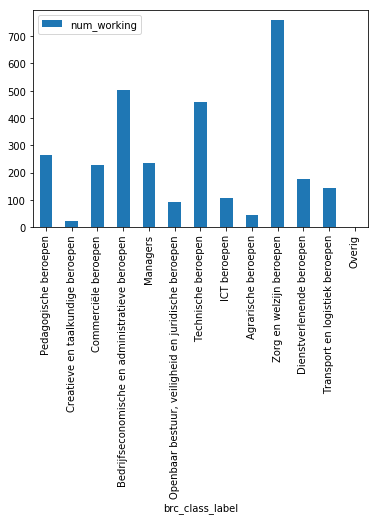

In [114]:
expl27.plot.bar(x='brc_class_label',y='num_working')
plt.show()

In [115]:
df_type2 = compare_df(dfx,df_type1,'isco_code')

In [116]:
len(df_type2['isco_code'].unique())

238

In [117]:
## select a subset of new_df5 that holds the same iscocodes
dfminmax = df_type2[['isco_code','num_working','brc_beroep']]
dfminmax = pd.merge(dfminmax,df_beroep, on=['brc_beroep'], how='inner')
dfminmax = dfminmax.drop(labels='brc_beroep', axis = 1)
dfminmax = dfminmax.drop_duplicates()
dfminmax = dfminmax.reset_index(drop=True)
dfminmax.head()

,isco_code,num_working,brc_sector
0,1112,16,6
1,1114,5,6
2,1120,75,5
3,1212,18,5
4,1219,23,5


In [118]:
dfminmax['NumPerc']=0


dfminmax['PercentageAvg']=0 
dfminmax['PercentageMin']=0
dfminmax['PercentageMax']=0
dfminmax['Percentage1']=0 
dfminmax['Percentage2']=0 
dfminmax['Percentage3']=0 
dfminmax['Percentage4']=0 
dfminmax['Percentage5']=0 
dfminmax['Percentage5']=0 
dfminmax['Percentage6']=0 
dfminmax['Percentage7']=0 
dfminmax['Percentage8']=0 
dfminmax['Percentage9']=0 
dfminmax['Percentage10']=0 
dfminmax['Percentage11']=0 
dfminmax['Percentage12']=0 
dfminmax['Percentage13']=0 

In [119]:
dfminmax.head()

,isco_code,num_working,brc_sector,NumPerc,PercentageAvg,PercentageMin,PercentageMax,Percentage1,Percentage2,Percentage3,Percentage4,Percentage5,Percentage6,Percentage7,Percentage8,Percentage9,Percentage10,Percentage11,Percentage12,Percentage13
0,1112,16,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1114,5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1120,75,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1212,18,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1219,23,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [120]:
i = 0
for index, row in df_type2.iterrows():
    #print (index, row['Probability'], row['isco_code'])
    row_select = dfminmax.loc[dfminmax['isco_code'] == row['isco_code']] #, (dfminmax.loc['Percentage1'] == 0)]
    isco_code = row['isco_code']
    prob_value = row['Probability']
    valueI = row_select.index.values.astype(int)[0]
    
    
    x1 = row_select.iloc[0]['Percentage1']
    x2 = row_select.iloc[0]['Percentage2']
    x3 = row_select.iloc[0]['Percentage3']
    x4 = row_select.iloc[0]['Percentage4']
    x5 = row_select.iloc[0]['Percentage5']
    x6 = row_select.iloc[0]['Percentage6']
    x7 = row_select.iloc[0]['Percentage7']
    x8 = row_select.iloc[0]['Percentage8']
    x9 = row_select.iloc[0]['Percentage9']
    x10 = row_select.iloc[0]['Percentage10']
    x11 = row_select.iloc[0]['Percentage11']
    x12 = row_select.iloc[0]['Percentage12']
    x13 = row_select.iloc[0]['Percentage13']
    

    if x1 == 0:
        dfminmax.loc[valueI, 'Percentage1'] = prob_value
    elif x2 == 0:
        dfminmax.loc[valueI, 'Percentage2'] = prob_value
    elif x3 == 0:
        dfminmax.loc[valueI, 'Percentage3'] = prob_value
    elif x4 == 0:
        dfminmax.loc[valueI, 'Percentage4'] = prob_value
    elif x5 == 0:
        dfminmax.loc[valueI, 'Percentage5'] = prob_value
    elif x6 == 0:
        dfminmax.loc[valueI, 'Percentage6'] = prob_value
    elif x7 == 0:
        dfminmax.loc[valueI, 'Percentage7'] = prob_value
    elif x8 == 0:
        dfminmax.loc[valueI, 'Percentage8'] = prob_value
    elif x9 == 0:
        dfminmax.loc[valueI, 'Percentage9'] = prob_value
    elif x10 == 0:
        dfminmax.loc[valueI, 'Percentage10'] = prob_value
    elif x11 == 0:
        dfminmax.loc[valueI, 'Percentage11'] = prob_value
    elif x12 == 0:
        dfminmax.loc[valueI, 'Percentage12'] = prob_value
    elif x13 == 0:
        dfminmax.loc[valueI, 'Percentage13'] = prob_value

                


    
#    i = i + 1
#    if i == 5:
#        break
    

In [121]:
dfminmax.head()

,isco_code,num_working,brc_sector,NumPerc,PercentageAvg,PercentageMin,PercentageMax,Percentage1,Percentage2,Percentage3,Percentage4,Percentage5,Percentage6,Percentage7,Percentage8,Percentage9,Percentage10,Percentage11,Percentage12,Percentage13
0,1112,16,6,0,0,0,0,0.0150,0.003,0.1600,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1114,5,6,0,0,0,0,0.2500,0.015,0.1600,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1120,75,5,0,0,0,0,0.1600,0.015,0.0000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1212,18,5,0,0,0,0,0.0063,0.960,0.0055,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1219,23,5,0,0,0,0,0.0150,0.750,0.7300,0.25,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
dfminmax[dfminmax['isco_code'] == 7412]
#dfminmax

,isco_code,num_working,brc_sector,NumPerc,PercentageAvg,PercentageMin,PercentageMax,Percentage1,Percentage2,Percentage3,Percentage4,Percentage5,Percentage6,Percentage7,Percentage8,Percentage9,Percentage10,Percentage11,Percentage12,Percentage13
186,7412,44,7,0,0,0,0,0.9,0.76,0.003,0.91,0.38,0.61,0.63,0.72,0.39,0.82,0.91,0.93,0.41


In [123]:
row_select

,isco_code,num_working,brc_sector,NumPerc,PercentageAvg,PercentageMin,PercentageMax,Percentage1,Percentage2,Percentage3,Percentage4,Percentage5,Percentage6,Percentage7,Percentage8,Percentage9,Percentage10,Percentage11,Percentage12,Percentage13
237,9629,7,12,0,0,0,0,0.97,0.72,0.43,0.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
#Method: Get the number of percentages in a row
i = 0

expl28 = row_select

isco_code = expl28['isco_code']

expl28 = expl28.drop(labels=['isco_code','num_working','brc_sector','NumPerc','PercentageAvg','PercentageMin','PercentageMax'],axis=1)
expl28 = expl28.reset_index(drop=True)
expl28 = expl28.transpose()
expl28 = expl28.rename(columns={0:'percentages'})

expl28 = expl28[expl28['percentages']>0]

PerNum = len(expl28)
PerAvg = expl28['percentages'].sum() / PerNum
PerMin = expl28['percentages'].min()
PerMax = expl28['percentages'].max()


print(PerNum)
print(PerAvg)
print(PerMin)
print(PerMax)



4
0.77
0.43
0.97


In [125]:
def row_filler(row):
    
    expl28 = row
    
    global PerNum
    global PerAvg
    global PerMin
    global PerMax

    isco_code = expl28['isco_code']

    expl28 = expl28.drop(labels=['isco_code','num_working','brc_sector','NumPerc','PercentageAvg','PercentageMin','PercentageMax'],axis=1)
    expl28 = expl28.reset_index(drop=True)
    expl28 = expl28.transpose()
    expl28 = expl28.rename(columns={0:'percentages'})

    expl28 = expl28[expl28['percentages']>0]

    PerNum = len(expl28)
    PerAvg = expl28['percentages'].sum() / PerNum
    PerMin = expl28['percentages'].min()
    PerMax = expl28['percentages'].max()


    #print(PerNum)
    #print(PerAvg)
    #print(PerMin)
    #print(PerMax)


In [126]:
for index, row in dfminmax.iterrows():

    row = pd.DataFrame(row)
    row = row.transpose()
    row_filler(row)
    
    #print(index)
    #print(PerNum)
    
    
    #row_select = dfminmax.loc[dfminmax['isco_code'] == row['isco_code']] #, (dfminmax.loc['Percentage1'] == 0)]
    #isco_code = row['isco_code']
    #prob_value = row['Probability']
    #valueI = row.index.values.astype(int)[0]
    
    
    x1 = row_select.iloc[0]['NumPerc']
    x2 = row_select.iloc[0]['PercentageAvg']
    x3 = row_select.iloc[0]['PercentageMin']
    x4 = row_select.iloc[0]['PercentageMax']
    
    dfminmax.loc[index, 'NumPerc'] = PerNum
    dfminmax.loc[index, 'PercentageAvg'] = PerAvg
    dfminmax.loc[index, 'PercentageMin'] = PerMin
    dfminmax.loc[index, 'PercentageMax'] = PerMax
    

In [127]:
dfminmax.head()

,isco_code,num_working,brc_sector,NumPerc,PercentageAvg,PercentageMin,PercentageMax,Percentage1,Percentage2,Percentage3,Percentage4,Percentage5,Percentage6,Percentage7,Percentage8,Percentage9,Percentage10,Percentage11,Percentage12,Percentage13
0,1112,16,6,3,0.059333,0.0030,0.16,0.0150,0.003,0.1600,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1114,5,6,3,0.141667,0.0150,0.25,0.2500,0.015,0.1600,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1120,75,5,2,0.087500,0.0150,0.16,0.1600,0.015,0.0000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1212,18,5,3,0.323933,0.0055,0.96,0.0063,0.960,0.0055,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1219,23,5,5,0.355000,0.0150,0.75,0.0150,0.750,0.7300,0.25,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3 scenario's MinMaxAvg


In [128]:
dfmin_sel = dfminmax[['isco_code','PercentageMin']]
dfmin_sel.head()

,isco_code,PercentageMin
0,1112,0.0030
1,1114,0.0150
2,1120,0.0150
3,1212,0.0055
4,1219,0.0150


In [129]:
dfmax_sel = dfminmax[['isco_code','PercentageMax']]
dfmax_sel.head()

,isco_code,PercentageMax
0,1112,0.16
1,1114,0.25
2,1120,0.16
3,1212,0.96
4,1219,0.75


In [130]:
dfavg_sel = dfminmax[['isco_code','PercentageAvg']]
dfavg_sel.head()

,isco_code,PercentageAvg
0,1112,0.059333
1,1114,0.141667
2,1120,0.087500
3,1212,0.323933
4,1219,0.355000


In [131]:
new_df6.head()

,Occupation,Probability,Rank,brc_beroep,brc_class_label,brc_name,brc_sector,isco_code,isco_name,num_working,soc_code
0,Chief Executives,0.015,70.,551,Managers,Managers z.n.d.,5,1000,Leidinggevende functies,14,11-1011
1,Chief Executives,0.015,70.,611,"Openbaar bestuur, veiligheid en juridische beroepen",NaN,6,1112,Ambtenaren in beleidvoerende functies,16,11-1011
2,"Managers, All Other",0.250,226.,611,"Openbaar bestuur, veiligheid en juridische beroepen",NaN,6,1114,Beleidvoerende medewerkers van belangenorganisaties,5,11-9199
3,General and Operations Managers,0.160,195.,511,Managers,NaN,5,1120,Directeuren van grote ondernemingen,75,11-1021
4,Financial Managers,0.069,152.,521,Managers,NaN,5,1211,Leidinggevende functies op financieel gebied,29,11-3031


In [132]:
df_mma = new_df6[['isco_code','isco_name','brc_beroep','num_working','brc_sector']]
df_mma.head()

,isco_code,isco_name,brc_beroep,num_working,brc_sector
0,1000,Leidinggevende functies,551,14,5
1,1112,Ambtenaren in beleidvoerende functies,611,16,6
2,1114,Beleidvoerende medewerkers van belangenorganisaties,611,5,6
3,1120,Directeuren van grote ondernemingen,511,75,5
4,1211,Leidinggevende functies op financieel gebied,521,29,5


In [133]:
df_type1_sel = df_type1[['isco_code','isco_name','brc_beroep','num_working','brc_sector','Probability']]
df_type1_sel.head()

,isco_code,isco_name,brc_beroep,num_working,brc_sector,Probability
0,1000,Leidinggevende functies,551,14,5,0.015
4,1211,Leidinggevende functies op financieel gebied,521,29,5,0.069
6,1213,Leidinggevende functies op het gebied van beleid en planning,521,9,5,0.250
11,1311,Leidinggevende functies op het gebied van de landbouw- en bosbouwproductie,531,0,5,0.047
12,1321,Leidinggevende functies in de industrie,531,22,5,0.030


.



Create the dataframe for the minimum probabilities 





In [134]:
df_min2 = pd.merge(df_mma,dfmin_sel,on=['isco_code'], how ='inner')

In [135]:
df_min2 = df_min2.rename(columns= {'PercentageMin': 'Probability'})

In [136]:
df_min2.head()

,isco_code,isco_name,brc_beroep,num_working,brc_sector,Probability
0,1112,Ambtenaren in beleidvoerende functies,611,16,6,0.0030
1,1114,Beleidvoerende medewerkers van belangenorganisaties,611,5,6,0.0150
2,1120,Directeuren van grote ondernemingen,511,75,5,0.0150
3,1212,Leidinggevende functies op het gebied van personeelszaken,521,18,5,0.0055
4,1219,"Leidinggevende functies op het gebied van zakelijke diensten en op administratief gebied, niet ...",521,23,5,0.0150


In [137]:
df_min = pd.concat([df_min2,df_type1_sel])
df_min.head()

,isco_code,isco_name,brc_beroep,num_working,brc_sector,Probability
0,1112,Ambtenaren in beleidvoerende functies,611,16,6,0.0030
1,1114,Beleidvoerende medewerkers van belangenorganisaties,611,5,6,0.0150
2,1120,Directeuren van grote ondernemingen,511,75,5,0.0150
3,1212,Leidinggevende functies op het gebied van personeelszaken,521,18,5,0.0055
4,1219,"Leidinggevende functies op het gebied van zakelijke diensten en op administratief gebied, niet ...",521,23,5,0.0150


.





Create the dataframe for the maximum probabilities 

In [138]:
df_max2 = pd.merge(df_mma,dfmax_sel,on=['isco_code'], how ='inner')

In [139]:
df_max2 = df_max2.rename(columns = {'PercentageMax': 'Probability'})

In [140]:
df_max = pd.concat([df_max2,df_type1_sel])
df_max.head()

,isco_code,isco_name,brc_beroep,num_working,brc_sector,Probability
0,1112,Ambtenaren in beleidvoerende functies,611,16,6,0.16
1,1114,Beleidvoerende medewerkers van belangenorganisaties,611,5,6,0.25
2,1120,Directeuren van grote ondernemingen,511,75,5,0.16
3,1212,Leidinggevende functies op het gebied van personeelszaken,521,18,5,0.96
4,1219,"Leidinggevende functies op het gebied van zakelijke diensten en op administratief gebied, niet ...",521,23,5,0.75


.




Create the dataframe for the avarge probabilities

In [141]:
df_avg2 = pd.merge(df_mma,dfavg_sel, on=['isco_code'], how = 'inner')

In [142]:
df_avg2 = df_avg2.rename(columns = {'PercentageAvg': 'Probability'})

In [143]:
df_avg = pd.concat([df_avg2,df_type1_sel])
df_avg.head()

,isco_code,isco_name,brc_beroep,num_working,brc_sector,Probability
0,1112,Ambtenaren in beleidvoerende functies,611,16,6,0.059333
1,1114,Beleidvoerende medewerkers van belangenorganisaties,611,5,6,0.141667
2,1120,Directeuren van grote ondernemingen,511,75,5,0.087500
3,1212,Leidinggevende functies op het gebied van personeelszaken,521,18,5,0.323933
4,1219,"Leidinggevende functies op het gebied van zakelijke diensten en op administratief gebied, niet ...",521,23,5,0.355000


In [144]:
df_avg2 = df_avg.reset_index(drop = True)
df_avg2.head()

,isco_code,isco_name,brc_beroep,num_working,brc_sector,Probability
0,1112,Ambtenaren in beleidvoerende functies,611,16,6,0.059333
1,1114,Beleidvoerende medewerkers van belangenorganisaties,611,5,6,0.141667
2,1120,Directeuren van grote ondernemingen,511,75,5,0.087500
3,1212,Leidinggevende functies op het gebied van personeelszaken,521,18,5,0.323933
4,1219,"Leidinggevende functies op het gebied van zakelijke diensten en op administratief gebied, niet ...",521,23,5,0.355000


In [145]:
df_avg2[df_avg2['brc_sector'] == 13]

,isco_code,isco_name,brc_beroep,num_working,brc_sector,Probability


In [146]:
graph_OF = pd.DataFrame(np.array([[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0] ])
                        ,columns=['0-10', '10-20', '20-30', '30-40','40-50', '50-60', '60-70', '70-80','80-90', '90-100'])

In [147]:
graph_OF = pd.DataFrame(np.array([[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0],[0, 0, 0, 0, 0 ,0,0,0,0,0] ])
                        ,columns=[0,1,2,3,4,5,6,7,8,9])

In [148]:
graph_OF

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


In [149]:
graph_OF.loc[0,9] = 0.1

In [150]:
graph_OF

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0.1
1,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0.0
5,0,0,0,0,0,0,0,0,0,0.0
6,0,0,0,0,0,0,0,0,0,0.0
7,0,0,0,0,0,0,0,0,0,0.0
8,0,0,0,0,0,0,0,0,0,0.0
9,0,0,0,0,0,0,0,0,0,0.0


In [151]:
df = df_avg2[df_avg2['Probability'] < 0.1]
df = df[df['Probability'] > 0]
     
df['num_working'].sum()

2070

In [152]:
for i in range (0,12): 
    sec = i + 1
    #print (sec)
    x = 0
    y = 0.1
    
    for j in range (0,10):
        
        df = df_avg2[df_avg2['brc_sector'] == sec]
        
        df = df[df['Probability'] < y]
        df = df[df['Probability'] > x]
        
        numb = df['num_working'].sum()
        #print(numb)
        graph_OF.loc[i,j] = numb
        
        x = x + 0.1
        y = y + 0.1
        

In [153]:
graph_OF

,0,1,2,3,4,5,6,7,8,9
0,475,50,2,25,0,35,0,0,0,0.0
1,133,28,14,29,0,4,3,0,0,0.0
2,0,154,38,156,2,5,77,0,0,451.0
3,215,0,170,0,79,17,80,36,226,736.0
4,287,52,35,41,0,17,0,0,0,0.0
5,91,17,45,29,6,5,0,0,49,26.0
6,152,120,0,84,61,102,159,162,241,94.0
7,231,0,0,0,19,0,27,1,3,0.0
8,0,0,0,0,0,22,77,62,10,12.0
9,482,234,65,0,241,43,34,6,0,26.0


In [154]:
graph_OF2 = graph_OF

In [155]:
graph_OF2 = graph_OF2.rename(columns={0:'0-10',1:'10-20',2:'20-30',3:'30-40',4:'40-50',5:'50-60',6:'60-70',7:'70-80',8:'80-90',9:'90-100'})

In [156]:
graph_OF2 = graph_OF2.transpose()

In [157]:
graph_OF2 = graph_OF2.rename(columns={0:'Pedagogical', 1:'Creative and liguistic',
                                      2:'Commercial', 3:'Business and administrative',
                                      4:'Managers', 5:'Public administration, security and legal',
                                      6:'Technical', 7:'ICT', 8: 'Agricultural',
                                      9:'Care and Welfare', 10:'Service',
                                      11: 'Transport and Logistics'})

In [158]:
graph_OF2

,Pedagogical,Creative and liguistic,Commercial,Business and administrative,Managers,"Public administration, security and legal",Technical,ICT,Agricultural,Care and Welfare,Service,Transport and Logistics
0-10,475.0,133.0,0.0,215.0,287.0,91.0,152.0,231.0,0.0,482.0,0.0,4.0
10-20,50.0,28.0,154.0,0.0,52.0,17.0,120.0,0.0,0.0,234.0,12.0,19.0
20-30,2.0,14.0,38.0,170.0,35.0,45.0,0.0,0.0,0.0,65.0,0.0,6.0
30-40,25.0,29.0,156.0,0.0,41.0,29.0,84.0,0.0,0.0,0.0,116.0,0.0
40-50,0.0,0.0,2.0,79.0,0.0,6.0,61.0,19.0,0.0,241.0,24.0,118.0
50-60,35.0,4.0,5.0,17.0,17.0,5.0,102.0,0.0,22.0,43.0,163.0,180.0
60-70,0.0,3.0,77.0,80.0,0.0,0.0,159.0,27.0,77.0,34.0,90.0,174.0
70-80,0.0,0.0,0.0,36.0,0.0,0.0,162.0,1.0,62.0,6.0,94.0,29.0
80-90,0.0,0.0,0.0,226.0,0.0,49.0,241.0,3.0,10.0,0.0,85.0,68.0
90-100,0.0,0.0,451.0,736.0,0.0,26.0,94.0,0.0,12.0,26.0,22.0,4.0


In [159]:
graph_OF2 = graph_OF2[['Commercial','ICT','Public administration, security and legal',
                       'Care and Welfare','Service','Pedagogical','Business and administrative',
                       'Agricultural','Creative and liguistic','Managers', 'Technical',
                       'Transport and Logistics']]
                    

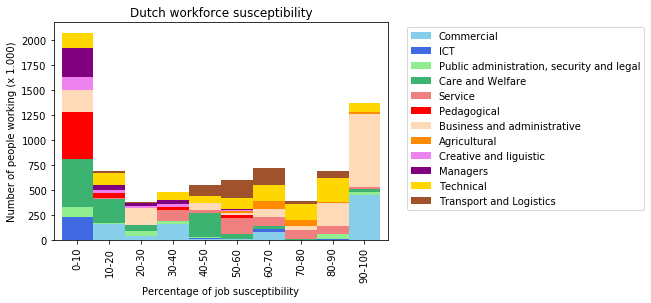

In [160]:

graph_OF2.plot.bar(stacked = True, color=['skyblue','royalblue','lightgreen','mediumseagreen',
                                          'lightcoral','red','peachpuff','darkorange',
                                          'violet','purple','gold','sienna'], width = 1.0)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams["legend.fontsize"] = 'x-large'

plt.title('Dutch workforce susceptibility')
plt.ylabel('Number of people working (x 1.000)')
plt.xlabel('Percentage of job susceptibility')


plt.savefig('foo.png')
plt.show()


## 3.2 uncertainty scenario's  

In [161]:
## Create definitions to select which occupations are losing jobs 
## Now this will be defined as scenario 1

## All the occupations that have a percentage higher than 40 percent lose 0.5 of their jobs
## All the occupations that have a percentage higher than 60 percent lose 0.75 of their jobs
## All the occupations that have a percentage higher than 80 percent lose all of their jobs

def job_lost (row,numb1,numb2):
    if (row['Probability']) >= 0.7 :
        return (row['num_working'] * numb1)
    else:
        if (row['Probability']) >= 0.3 :
            return (row['num_working'] * numb2)
        else:
            return 0

In [162]:
## Apply the lost jobs to a new column in the dataframe
susA = 1
susB = 0.5


df_min['jobs_lost_high'] = df_min.apply (lambda row: job_lost(row,susA,susB), axis=1)
df_max['jobs_lost_high'] = df_max.apply (lambda row: job_lost(row,susA,susB), axis=1)
df_avg['jobs_lost_high'] = df_avg.apply (lambda row: job_lost(row,susA,susB), axis=1)

In [163]:
## Apply the lost jobs to a new column in the dataframe
susA = 0.6
susB = 0


df_min['jobs_lost_low'] = df_min.apply (lambda row: job_lost(row,susA,susB), axis=1)
df_max['jobs_lost_low'] = df_max.apply (lambda row: job_lost(row,susA,susB), axis=1)
df_avg['jobs_lost_low'] = df_avg.apply (lambda row: job_lost(row,susA,susB), axis=1)

In [164]:
## Apply the lost jobs to a new column in the dataframe
susA = 0.8
susB = 0.25


df_min['jobs_lost_avg'] = df_min.apply (lambda row: job_lost(row,susA,susB), axis=1)
df_max['jobs_lost_avg'] = df_max.apply (lambda row: job_lost(row,susA,susB), axis=1)
df_avg['jobs_lost_avg'] = df_avg.apply (lambda row: job_lost(row,susA,susB), axis=1)

In [165]:
print(int(df_min['jobs_lost_low'].sum() * 1000))
print(int(df_min['jobs_lost_high'].sum() * 1000))
print(int(df_min['jobs_lost_avg'].sum() * 1000))

1363800
3028500
2196150


In [166]:
df_min.head()

,isco_code,isco_name,brc_beroep,num_working,brc_sector,Probability,jobs_lost_high,jobs_lost_low,jobs_lost_avg
0,1112,Ambtenaren in beleidvoerende functies,611,16,6,0.0030,0.0,0.0,0.0
1,1114,Beleidvoerende medewerkers van belangenorganisaties,611,5,6,0.0150,0.0,0.0,0.0
2,1120,Directeuren van grote ondernemingen,511,75,5,0.0150,0.0,0.0,0.0
3,1212,Leidinggevende functies op het gebied van personeelszaken,521,18,5,0.0055,0.0,0.0,0.0
4,1219,"Leidinggevende functies op het gebied van zakelijke diensten en op administratief gebied, niet ...",521,23,5,0.0150,0.0,0.0,0.0


In [167]:
df_classlabel

,brc_sector,brc_class_label
0,1,Pedagogische beroepen
1,2,Creatieve en taalkundige beroepen
2,3,Commerciële beroepen
3,4,Bedrijfseconomische en administratieve beroepen
4,5,Managers
5,6,"Openbaar bestuur, veiligheid en juridische beroepen"
6,7,Technische beroepen
7,8,ICT beroepen
8,9,Agrarische beroepen
9,10,Zorg en welzijn beroepen


In [168]:
review = df_avg[df_avg['brc_sector'] == 11]

In [169]:
review.sum()

isco_code                                                                                                      159256
isco_name          Chef-koks Reisbegeleiders en stewards Conducteurs Reisleiders en gidsen Koks Kelners Kappers Sc...
brc_beroep                                                                                                      27906
num_working                                                                                                       797
brc_sector                                                                                                        275
Probability                                                                                                   14.5145
jobs_lost_high                                                                                                  588.5
jobs_lost_low                                                                                                   235.2
jobs_lost_avg                                           

In [170]:
review = review.sort_values('jobs_lost_avg', ascending =False)
review[['isco_name','Probability','num_working','jobs_lost_avg']]

,isco_name,Probability,num_working,jobs_lost_avg
127,Kelners,0.900000,191,152.80
232,Keukenhulpen,0.850000,64,51.20
126,Koks,0.732000,57,45.60
226,"Schoonmakers in hotels, kantoren e.d.",0.573333,163,40.75
225,Barpersoneel,0.770000,37,29.60
375,Huishoudelijke hulpen en schoonmakers in huishoudens,0.690000,63,15.75
228,"Toezichthouders huishoudelijk en reinigingspersoneel in kantoren, hotels e.d.",0.940000,17,13.60
128,Kappers,0.328667,45,11.25
231,Bereiders van fastfood,0.875000,12,9.60
129,Schoonheidsspecialisten e.d.,0.371000,31,7.75


In [211]:
def visual_sectors (df,scenario):
    expl30 = pd.DataFrame(columns=['brc_sector', 'brc_class_label', 'jobs_lost', 'num_working','percentageJL'])
    global expl332

    for i in range(12):
        i = i +1
        sector = i
        class_label = df_classlabel[df_classlabel.brc_sector == i]
        class_label = class_label.iloc[0]['brc_sector']
    
        df_sectori = df[df.brc_sector == i]
        jobs_lost = int(df_sectori[scenario].sum() * 1000)
        num_work = int(df_sectori.num_working.sum() * 1000)
        per_lost = df_sectori[scenario].sum() / df_sectori.num_working.sum()
        i = i -1
    
        expl30 = expl30.append({'brc_sector': sector,'brc_class_label': class_label,'jobs_lost': jobs_lost,'num_working':num_work, 'percentageJL':per_lost }, ignore_index=True)
    
    print("Number of jobs lost for this scenario")
    print(int(expl30['jobs_lost'].sum()))
    
    expl30 = expl30.sort_values('percentageJL',)
    
    expl30 = expl30.drop(['brc_class_label', 'percentageJL'], axis=1)
    
    pltJL = expl30.plot.bar(x ='brc_sector')
    plt.show()
    expl332 = expl30
    

Number of jobs lost for this scenario
1363797


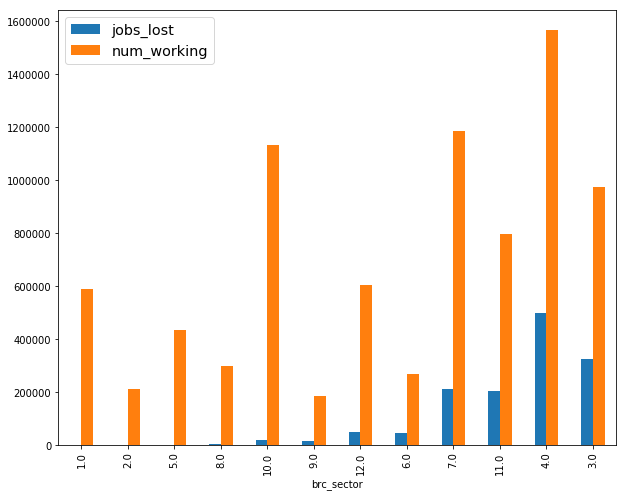

In [212]:
visual_sectors(df_min,'jobs_lost_low')
#visual_sectors(df_min,'jobs_lost_high')
#visual_sectors(df_min,'jobs_lost_avg')

#visual_sectors(df_max,'jobs_lost_low')
#visual_sectors(df_max,'jobs_lost_high')
#visual_sectors(df_max,'jobs_lost_avg')

#visual_sectors(df_avg,'jobs_lost_low')
#visual_sectors(df_avg,'jobs_lost_high')
#visual_sectors(df_avg,'jobs_lost_avg')

In [213]:
expl332 = expl332.rename(columns={'jobs_lost':'Scenario_Min_LowTech','num_working':'Total_Number_of_Jobs'})
expl332

,brc_sector,Scenario_Min_LowTech,Total_Number_of_Jobs
0,1.0,0.0,587000.0
1,2.0,0.0,211000.0
4,5.0,0.0,432000.0
7,8.0,2400.0,296000.0
9,10.0,19200.0,1131000.0
8,9.0,13199.0,185000.0
11,12.0,48599.0,602000.0
5,6.0,45000.0,268000.0
6,7.0,210600.0,1184000.0
10,11.0,201000.0,797000.0


In [195]:
expl333 = expl333[['brc_sector', 'jobs_lost']]
expl333 = expl333.rename(columns={'jobs_lost':'Scenario_Avg_MidTech'})
expl333

,brc_sector,Scenario_Avg_MidTech
0,1.0,15000.0
4,5.0,14500.0
1,2.0,9000.0
7,8.0,18450.0
9,10.0,118100.0
5,6.0,70000.0
11,12.0,198800.0
6,7.0,502300.0
8,9.0,93550.0
2,3.0,493600.0


In [175]:
expl334 = expl334[['brc_sector', 'jobs_lost']]
expl334 = expl334.rename(columns={'jobs_lost':'Scenario_Max_HighTech'})
expl334

,brc_sector,Scenario_Max_HighTech
0,1.0,42500.0
4,5.0,49500.0
7,8.0,42000.0
1,2.0,51500.0
9,10.0,309000.0
5,6.0,139000.0
6,7.0,870000.0
2,3.0,737000.0
3,4.0,1198500.0
10,11.0,644500.0


In [236]:
total_plt = pd.DataFrame.merge(expl332,expl333, on = 'brc_sector', how = 'inner')
total_plt

,brc_sector,Scenario_Min_LowTech,Total_Number_of_Jobs,Scenario_Avg_MidTech
0,1.0,0.0,587000.0,15000.0
1,2.0,0.0,211000.0,9000.0
2,5.0,0.0,432000.0,14500.0
3,8.0,2400.0,296000.0,18450.0
4,10.0,19200.0,1131000.0,118100.0
5,9.0,13199.0,185000.0,93550.0
6,12.0,48599.0,602000.0,198800.0
7,6.0,45000.0,268000.0,70000.0
8,7.0,210600.0,1184000.0,502300.0
9,11.0,201000.0,797000.0,411850.0


In [237]:
total_plt = pd.DataFrame.merge(total_plt,expl334, on = 'brc_sector', how = 'inner')
total_plt

,brc_sector,Scenario_Min_LowTech,Total_Number_of_Jobs,Scenario_Avg_MidTech,Scenario_Max_HighTech
0,1.0,0.0,587000.0,15000.0,42500.0
1,2.0,0.0,211000.0,9000.0,51500.0
2,5.0,0.0,432000.0,14500.0,49500.0
3,8.0,2400.0,296000.0,18450.0,42000.0
4,10.0,19200.0,1131000.0,118100.0,309000.0
5,9.0,13199.0,185000.0,93550.0,174000.0
6,12.0,48599.0,602000.0,198800.0,511500.0
7,6.0,45000.0,268000.0,70000.0,139000.0
8,7.0,210600.0,1184000.0,502300.0,870000.0
9,11.0,201000.0,797000.0,411850.0,644500.0


In [238]:
total_plt = pd.DataFrame.merge(total_plt,df_classlabel, on = 'brc_sector', how = 'inner')

In [239]:
total_plt

,brc_sector,Scenario_Min_LowTech,Total_Number_of_Jobs,Scenario_Avg_MidTech,Scenario_Max_HighTech,brc_class_label
0,1,0.0,587000.0,15000.0,42500.0,Pedagogische beroepen
1,2,0.0,211000.0,9000.0,51500.0,Creatieve en taalkundige beroepen
2,5,0.0,432000.0,14500.0,49500.0,Managers
3,8,2400.0,296000.0,18450.0,42000.0,ICT beroepen
4,10,19200.0,1131000.0,118100.0,309000.0,Zorg en welzijn beroepen
5,9,13199.0,185000.0,93550.0,174000.0,Agrarische beroepen
6,12,48599.0,602000.0,198800.0,511500.0,Transport en logistiek beroepen
7,6,45000.0,268000.0,70000.0,139000.0,"Openbaar bestuur, veiligheid en juridische beroepen"
8,7,210600.0,1184000.0,502300.0,870000.0,Technische beroepen
9,11,201000.0,797000.0,411850.0,644500.0,Dienstverlenende beroepen


In [240]:
total_plt = total_plt[['brc_class_label','Scenario_Min_LowTech','Scenario_Avg_MidTech', 'Scenario_Max_HighTech','Total_Number_of_Jobs']]

In [241]:
total_plt

,brc_class_label,Scenario_Min_LowTech,Scenario_Avg_MidTech,Scenario_Max_HighTech,Total_Number_of_Jobs
0,Pedagogische beroepen,0.0,15000.0,42500.0,587000.0
1,Creatieve en taalkundige beroepen,0.0,9000.0,51500.0,211000.0
2,Managers,0.0,14500.0,49500.0,432000.0
3,ICT beroepen,2400.0,18450.0,42000.0,296000.0
4,Zorg en welzijn beroepen,19200.0,118100.0,309000.0,1131000.0
5,Agrarische beroepen,13199.0,93550.0,174000.0,185000.0
6,Transport en logistiek beroepen,48599.0,198800.0,511500.0,602000.0
7,"Openbaar bestuur, veiligheid en juridische beroepen",45000.0,70000.0,139000.0,268000.0
8,Technische beroepen,210600.0,502300.0,870000.0,1184000.0
9,Dienstverlenende beroepen,201000.0,411850.0,644500.0,797000.0


In [242]:
total_plt = total_plt.transpose()
total_plt = total_plt.rename(columns={0:'Pedagogical', 1:'Creative and liguistic',
                                      11:'Commercial', 10:'Business and administrative',
                                      2:'Managers', 7:'Public administration, security and legal',
                                      8:'Technical', 3:'ICT', 5: 'Agricultural',
                                      4:'Care and Welfare', 9:'Service',
                                      6: 'Transport and Logistics'})
total_plt = total_plt.transpose()
total_plt = total_plt[['Scenario_Min_LowTech','Scenario_Avg_MidTech', 'Scenario_Max_HighTech','Total_Number_of_Jobs']]
total_plt

,Scenario_Min_LowTech,Scenario_Avg_MidTech,Scenario_Max_HighTech,Total_Number_of_Jobs
Pedagogical,0,15000,42500,587000
Creative and liguistic,0,9000,51500,211000
Managers,0,14500,49500,432000
ICT,2400,18450,42000,296000
Care and Welfare,19200,118100,309000,1.131e+06
Agricultural,13199,93550,174000,185000
Transport and Logistics,48599,198800,511500,602000
"Public administration, security and legal",45000,70000,139000,268000
Technical,210600,502300,870000,1.184e+06
Service,201000,411850,644500,797000


In [243]:
total_plt['S_Min_LowTech'] =0 
total_plt['S_Avg_MedTech'] =0 
total_plt['S_Max_HighTech'] =0 


In [244]:
total_plt['S_Min_LowTech'] = total_plt['Total_Number_of_Jobs']-total_plt['Scenario_Min_LowTech']
total_plt['S_Avg_MedTech'] = total_plt['Total_Number_of_Jobs']-total_plt['Scenario_Avg_MidTech']
total_plt['S_Max_HighTech'] = total_plt['Total_Number_of_Jobs']-total_plt['Scenario_Max_HighTech']

In [247]:
total_plt = total_plt[['Total_Number_of_Jobs','S_Min_LowTech','S_Avg_MedTech', 'S_Max_HighTech']]

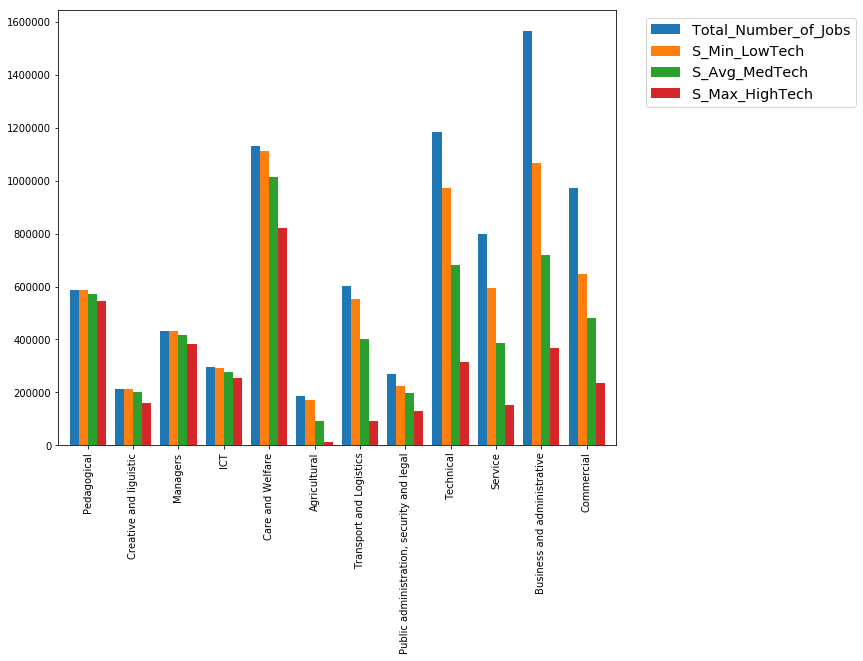

In [248]:
total_plt.plot.bar( legend = None, width = 0.8)

plt.savefig('foo2.png')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()



In [187]:
df_avg.to_csv('avg_data.csv', encoding='utf-8')
df_min.to_csv('min_data.csv', encoding='utf-8')
df_max.to_csv('max_data.csv', encoding='utf-8')